<a href="https://colab.research.google.com/github/laugustovieira/prophet_covid/blob/main/desafio_modulo03_aula03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
from fbprophet.plot import add_changepoints_to_plot
from fbprophet import Prophet
import matplotlib.pyplot as plt


In [42]:
url = '/content/drive/MyDrive/Dados_BootCamp/dados_covid_sp.csv'

In [43]:
dados = pd.read_csv(url, sep=";")

In [44]:
dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [45]:
dados["datahora"] = pd.to_datetime(dados["datahora"], format="%Y-%m-%d")

In [46]:
dados_rp = dados.query("nome_munic == 'Ribeirão Preto'")

In [47]:
df = pd.DataFrame()
df['ds'] = dados_rp['datahora'][:400]
df['y'] = dados_rp['casos_novos'][:400]
modelo = Prophet(n_changepoints=25, changepoint_prior_scale=10.0)
modelo.fit(df)
dataFramefuturo = modelo.make_future_dataframe(periods=43)
previsao = modelo.predict(dataFramefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


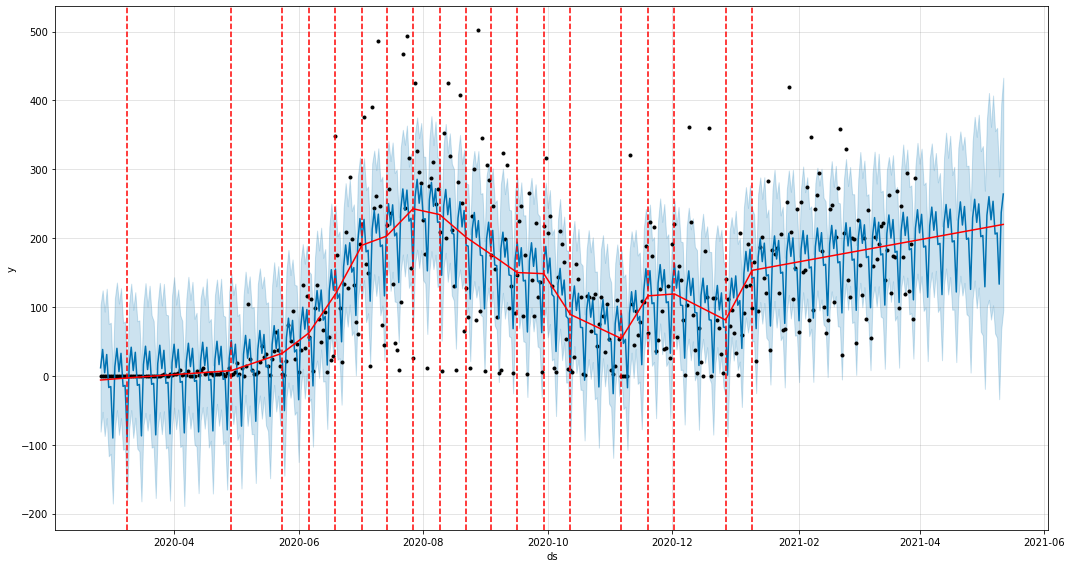

In [48]:
fig = modelo.plot(previsao,figsize=(15,8))
a = add_changepoints_to_plot(fig.gca(),modelo, previsao)

#Desafio 10 - Criar um modelo logistico

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


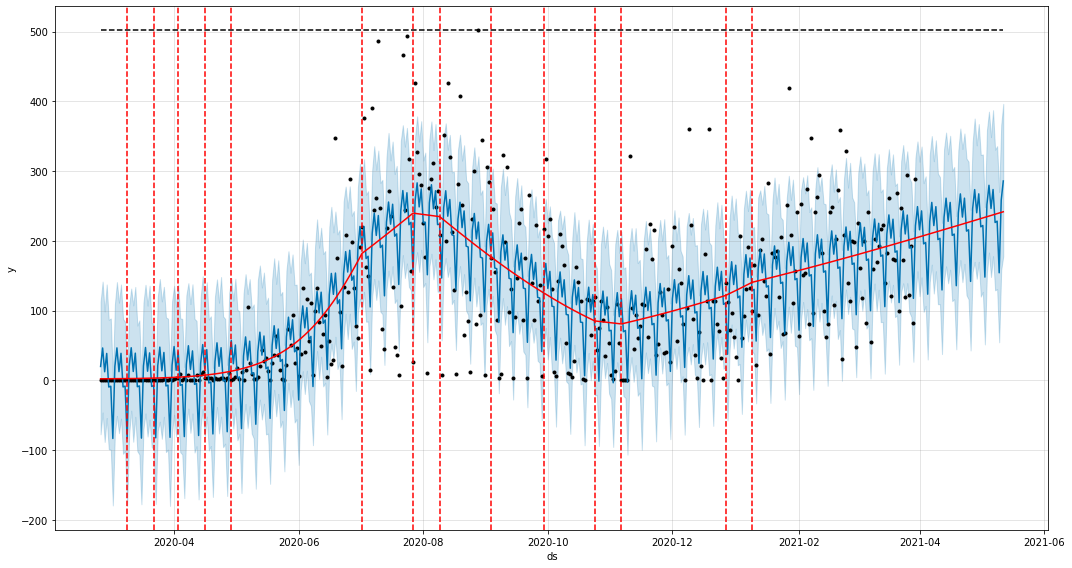

In [67]:
df = pd.DataFrame()
df['ds'] = dados_rp['datahora'][:400]
df['y'] = dados_rp['casos_novos'][:400]
df['cap'] = dados_rp['casos_novos'].max()
modelo = Prophet( growth='logistic',changepoints = None,n_changepoints=25, changepoint_prior_scale=10.0, changepoint_range=0.8)
modelo.fit(df)
dataFramefuturo = modelo.make_future_dataframe(periods=43)
dataFramefuturo['cap'] = dados_rp['casos_novos'].max()
previsao = modelo.predict(dataFramefuturo)

fig = modelo.plot(previsao,figsize=(15,8))
a=add_changepoints_to_plot(fig.gca(),modelo, previsao)

#Desafio 11: Identificar potenciais changepoints.

In [72]:
dados_rp["taxa_de_crescimento_casos"] = dados_rp["casos_novos"].diff()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<BarContainer object of 443 artists>

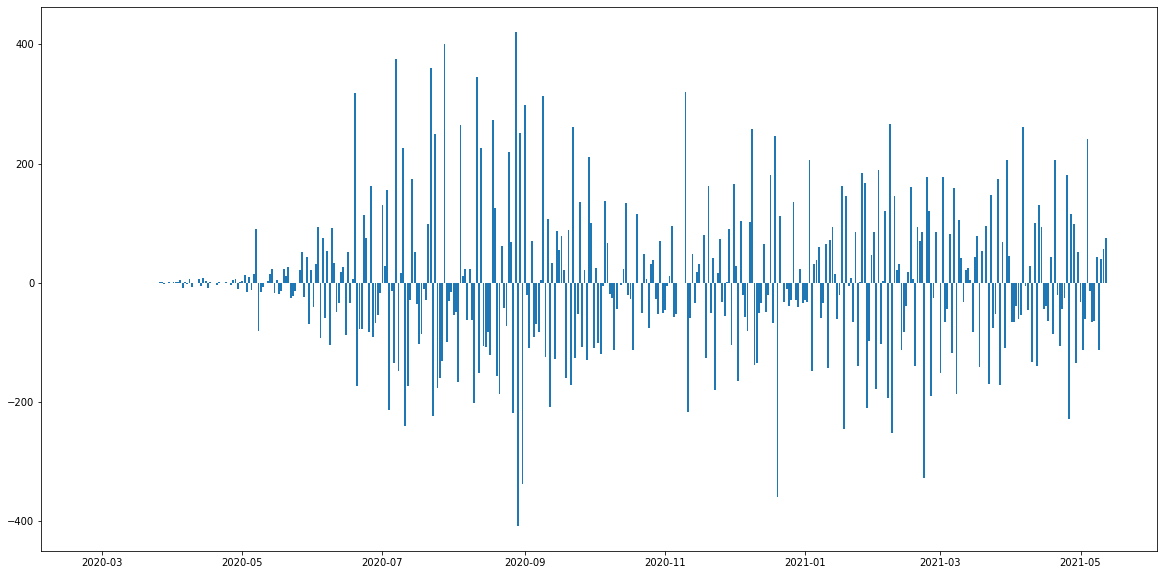

In [78]:
plt.figure(figsize=(20,10))
plt.bar(dados_rp['datahora'], dados_rp['taxa_de_crescimento_casos'])

Analisando percebe-se que as barras mais longas em maior constancia, mostra uma tendencia de aumento do número de casos.<br>
  - de Abril a Agosto, percebe-se um aumento no número de casos no modelo e na taxa de crescimento se percebe que as barras estão aumentando de tamanho ao longo deste período <br>
  - Em setebro começa uma queda no modelo assim como nas barras da taxa de crescimento.